In [97]:
from ipywidgets import interact

%matplotlib inline

import matplotlib.pyplot as plt
import skimage
import skimage.io
import skimage.feature
import skimage.segmentation
import skimage.filters
import skimage.transform
import scipy
import numpy as np
import pandas as pd
import sklearn
import sklearn.preprocessing
import itertools as it

from ipywidgets import interact
from IPython.display import display


from pydash import py_

from cad.metrics import geometry, exposure

In [2]:
img = skimage.io.imread('/d/blimp/c1.jpg')
eim = exposure.equalize(img)

/Users/prashantsinha/.virtualenvs/blimp/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint16
  "%s to %s" % (dtypeobj_in, dtypeobj))


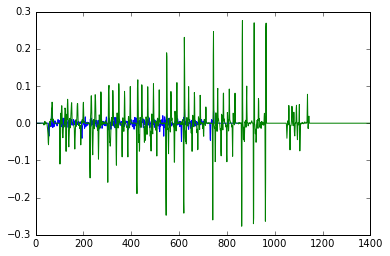

In [131]:
se = skimage.morphology.rectangle(1, 30)
e2m = skimage.transform.rotate(eim.copy(), 1.2, cval=1)

v_f = skimage.filters.gaussian(e2m, sigma=(50, 0), mode='reflect')

h_f = skimage.filters.gaussian(e2m, sigma=(0, 50), mode='reflect')


v_m = skimage.morphology.erosion(v_f, skimage.morphology.rectangle(80, 2))
h_m = skimage.morphology.erosion(h_f, skimage.morphology.rectangle(2, 80))

v_peaks = v_m.mean(axis=0)
h_peaks = h_m.mean(axis=1)


# plt.imshow(h_m * v_m, cmap=plt.cm.gray)
# plt.imshow(e2m, cmap=plt.cm.gray)
plt.plot((np.gradient(v_peaks)))
plt.plot((np.gradient(h_peaks)))
# plt.plot([v_cut for _ in range(len(v_peaks))])
# plt.plot([h_cut for _ in range(len(h_peaks))], list(range(len(h_peaks))))
# plt.plot(np.gradient(h_peaks), list(range(len(h_peaks))))

<IPython.core.display.Javascript object>


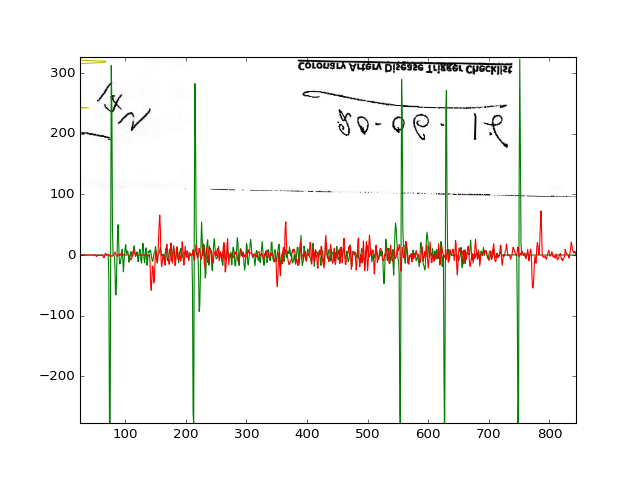

In [91]:
plt.plot(v_peaks)
plt.plot(np.gradient(v_peaks))